<a href="https://colab.research.google.com/github/huojiajin/NLP-Assignments/blob/main/Week7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

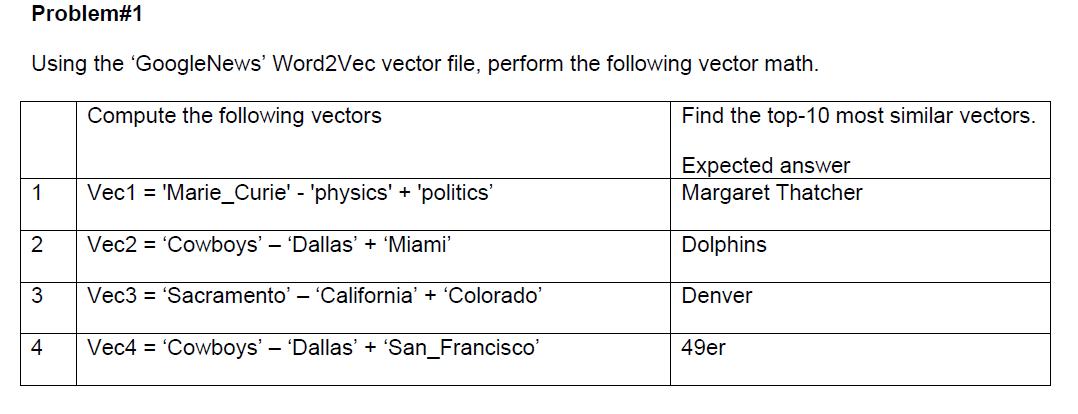

In [ ]:
from gensim.models import Word2Vec, KeyedVectors 
from google.colab import drive 
drive.mount('/content/drive') 
# At this stage Colab will try to access your Google Drive account. # Enter the password generated by Google Drive. 
path = "/content/drive/MyDrive/Colab Notebooks/NLP_Word2Vec/GoogleNews-vectors-negative300.bin"
# Provide the complete path of the ‘GoogleNews’ file
# stored in your Google Drive account.


In [ ]:
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=200000)

In [ ]:
Vec1 = model['Marie_Curie'] - model['physics'] + model['politics']
model.most_similar([Vec1])

[('Marie_Curie', 0.6391899585723877),
 ('politics', 0.45687681436538696),
 ('Sue_Ryder', 0.4075208902359009),
 ('Breakthrough_Breast_Cancer', 0.37573349475860596),
 ('Margaret_Thatcher', 0.3684638738632202),
 ('Marie_Curie_Cancer', 0.3580324649810791),
 ('politicians', 0.34992516040802),
 ('Breast_Cancer_Care', 0.34824055433273315),
 ('Mrs_Thatcher', 0.34574592113494873),
 ('politicans', 0.3389204740524292)]

In [ ]:
Vec2 = model['Cowboys'] - model['Dallas'] + model['Miami']
model.most_similar([Vec2])

[('Cowboys', 0.7327903509140015),
 ('Dolphins', 0.7073556184768677),
 ('Miami_Dolphins', 0.6461875438690186),
 ('Broncos', 0.6419292688369751),
 ('Seminoles', 0.6188381910324097),
 ('Gators', 0.6109527945518494),
 ('Hokies', 0.592700719833374),
 ('Dallas_Cowboys', 0.5866430401802063),
 ('Sooners', 0.5866405367851257),
 ('Cleveland_Browns', 0.5844414234161377)]

In [ ]:
Vec3 = model['Sacramento'] - model['California'] + model['Colorado']
model.most_similar([Vec3])

[('Denver', 0.7687567472457886),
 ('Colorado', 0.7621334791183472),
 ('Sacramento', 0.7206398248672485),
 ('Grand_Junction', 0.6696534156799316),
 ('Fort_Collins', 0.6669073104858398),
 ('Boulder', 0.6501880288124084),
 ('Colorado_Springs', 0.6477946043014526),
 ('Pueblo', 0.6256301403045654),
 ('Spokane', 0.6246552467346191),
 ('Gunnison', 0.6222272515296936)]

In [ ]:
Vec4 = model['Sacramento'] - model['California'] + model['Colorado']
model.most_similar([Vec4])

[('Denver', 0.7687567472457886),
 ('Colorado', 0.7621334791183472),
 ('Sacramento', 0.7206398248672485),
 ('Grand_Junction', 0.6696534156799316),
 ('Fort_Collins', 0.6669073104858398),
 ('Boulder', 0.6501880288124084),
 ('Colorado_Springs', 0.6477946043014526),
 ('Pueblo', 0.6256301403045654),
 ('Spokane', 0.6246552467346191),
 ('Gunnison', 0.6222272515296936)]

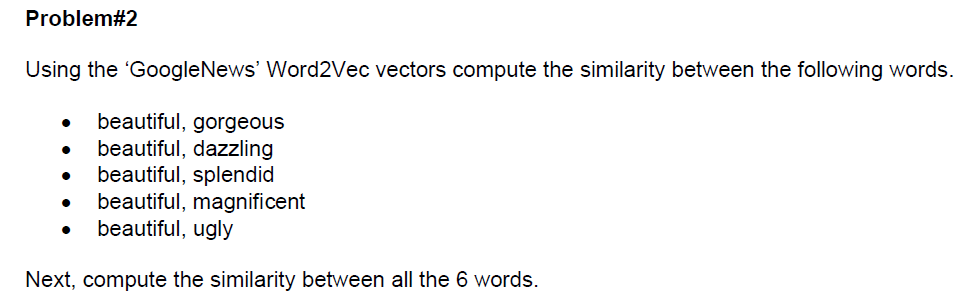

In [ ]:
import gensim.downloader as api 
wv = api.load('word2vec-google-news-300')

In [ ]:
pairs = [
    ('beautiful', 'gorgeous'),
    ('beautiful', 'dazzling'),
    ('beautiful', 'splendid'),
    ('beautiful', 'magnificent'),
    ('beautiful', 'ugly'),
]

for w1, w2 in pairs:
  print('%r \t %r \t %.4f' % (w1, w2, wv.similarity(w1, w2)))

import numpy as np

def computeSimilarity(w):
  sm = np.zeros((len(w), len(w)))

  for i in range(len(w)):
    for j in range(len(w)):
      sm[i, j] = wv.similarity(w[i], w[j])
  
  return sm

words1 = ['beautiful', 'gorgeous', 'dazzling', 'splendid', 'magnificent', 'ugly']
simMatrix = computeSimilarity(words1)
print(simMatrix)

'beautiful' 	 'gorgeous' 	 0.8353
'beautiful' 	 'dazzling' 	 0.4795
'beautiful' 	 'splendid' 	 0.5533
'beautiful' 	 'magnificent' 	 0.6591
'beautiful' 	 'ugly' 	 0.3344
[[1.         0.83530039 0.47949681 0.55334407 0.65914023 0.33444342]
 [0.83530039 0.99999994 0.52978837 0.55063331 0.60700852 0.29833746]
 [0.47949681 0.52978837 1.         0.66154236 0.62190461 0.21685989]
 [0.55334407 0.55063331 0.66154236 1.00000012 0.84087634 0.22497056]
 [0.65914023 0.60700852 0.62190461 0.84087634 0.99999994 0.22572012]
 [0.33444342 0.29833746 0.21685989 0.22497056 0.22572012 1.        ]]


**Problem#3**

Which words do not belong to this group? Prove by comparing their Word2Vec vectors and computing the similarity between them.

• False, fake, fraudulent, counterfeit, spurious, true

In [ ]:
print(wv.doesnt_match(['False', 'fake', 'fraudulent', 'counterfeit', 'spurious', 'true']))

words2 = ['False', 'fake', 'fraudulent', 'counterfeit', 'spurious', 'true']
simMatrix2 = computeSimilarity(words2)
print(simMatrix2)

true
[[1.         0.38327485 0.33628318 0.22249243 0.38772702 0.26079336]
 [0.38327485 1.         0.56097305 0.61354744 0.43347082 0.28052571]
 [0.33628318 0.56097305 0.99999994 0.48740029 0.40782991 0.23345369]
 [0.22249243 0.61354744 0.48740029 1.         0.32145473 0.15660341]
 [0.38772702 0.43347082 0.40782991 0.32145473 1.         0.28230762]
 [0.26079336 0.28052571 0.23345369 0.15660341 0.28230762 0.99999994]]


**Problem#4**
Compute the similarity between the following 2 words using the ‘Wiki-words’ Word2Vec file.

• Coke & Pepsi

In [ ]:
import tensorflow as tf 
import tensorflow_hub as hub 
import numpy as np 
embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")

In [ ]:
words = ['Coke', 'Pepsi']
embedding = embed(words)
similarity = np.zeros((len(words), len(words)))

for i in range(len(words)):
  for j in range(len(words)):
    similarity[i, j] = np.inner(embedding[i], embedding[j])

print('Similarity Metrix')
print(similarity)

Similarity Metrix
[[1.         0.62521559]
 [0.62521559 1.        ]]


**Problem#5**

For the following text, write Python code to compute the Skip-Ngram dataset for window size = 1,2,3.

Text: data science professionals have promising career path

In [ ]:
import numpy as np
import pandas as pd

# Define the function to remove stop words
def remove_stop_words(corpus):
  stop_words = ['is', 'a', 'an', 'will', 'be', 'become', 'many', 'in', 'like', 'and']
  results = []
  for text in corpus:
    tmp = text.split(' ')
    for stop_word in stop_words:
      if stop_word in tmp:
        tmp.remove(stop_word)
    results.append(" ".join(tmp))

  return results

# Define the function to generate skip-Ngram
def generate_Skip_Ngram(corpus, window_size):
  # Remove stop words
  corpus = remove_stop_words(corpus)
  #print(corpus)

  # Tokenize
  words = []
  for text in corpus:
    for word in text.split(' '):
      words.append(word)

  words = sorted(set(words))
  #print("words:\n", words)

  # Generate lable using skipgram
  word2int = {}
  for i, word in enumerate(words):
    word2int[word] = i
  print(word2int)

  sentences = []
  for sentence in corpus:
    for s in sentence.split(" "):
      sentences.append(s)
  #print("sentences:\n", sentences)

  skipNgram_data = []
  for idx, word in enumerate(sentences):
    #print("idx:", idx)
    #print("word:", word)
    #print("len(sentences):", len(sentences))
    #print("max(idx - window_size\, 0):", max(idx - window_size, 0))
    #print("min(idx + window_size, len(sentences)) + 1:", min(idx + window_size, len(sentences)) + 1)
    #print("sentence[max(idx - window_size, 0) : min(idx + window_size, len(sentences)) + 1]:", 
    #      sentences[max(idx - window_size, 0) : min(idx + window_size, len(sentences)) + 1])
    for neighbor in sentences[max(idx - window_size, 0) : min(idx + window_size, len(sentences)) + 1]:
      #print("neighbor:", neighbor)
      if neighbor != word:
        skipNgram_data.append([word, neighbor])
        #print("skipNgram_data:", skipNgram_data)

  skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
  return skipNgram_df


In [ ]:
# Window_Size = 1
corpus = ["data science professionals have promising career path"]
window_size = 1
skipNgram_df = generate_Skip_Ngram(corpus, window_size)
print('Window Size = ', window_size)
print('Number of Entries = ', len(skipNgram_df))
print(skipNgram_df)

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}
Window Size =  1
Number of Entries =  12
            input          label
0            data        science
1         science           data
2         science  professionals
3   professionals        science
4   professionals           have
5            have  professionals
6            have      promising
7       promising           have
8       promising         career
9          career      promising
10         career           path
11           path         career


In [ ]:
corpus = ["data science professionals have promising career path"]
window_size = 2
skipNgram_df = generate_Skip_Ngram(corpus, window_size)
print('Window Size = ', window_size)
print('Number of Entries = ', len(skipNgram_df))
print(skipNgram_df)

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}
Window Size =  2
Number of Entries =  22
            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals           data
6   professionals        science
7   professionals           have
8   professionals      promising
9            have        science
10           have  professionals
11           have      promising
12           have         career
13      promising  professionals
14      promising           have
15      promising         career
16      promising           path
17         career           have
18         career      promising
19         career           path
20           path      promising
21           path         career


In [ ]:
corpus = ["data science professionals have promising career path"]
window_size = 3
skipNgram_df = generate_Skip_Ngram(corpus, window_size)
print('Window Size = ', window_size)
print('Number of Entries = ', len(skipNgram_df))
print(skipNgram_df)

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}
Window Size =  3
Number of Entries =  30
            input          label
0            data        science
1            data  professionals
2            data           have
3         science           data
4         science  professionals
5         science           have
6         science      promising
7   professionals           data
8   professionals        science
9   professionals           have
10  professionals      promising
11  professionals         career
12           have           data
13           have        science
14           have  professionals
15           have      promising
16           have         career
17           have           path
18      promising        science
19      promising  professionals
20      promising           have
21      promising         career
22      promising           path
23         career  professionals
24         career           have
25  

**Problem#6**

For the Skip-Ngram generated in the previous problem, write Python code to generate 1-hot encoded (input & output) data for window size = 2.

In [ ]:
# Remove stop words
corpus = remove_stop_words(corpus)

# Tokenize
words = []
for text in corpus:
  for word in text.split(' '):
    words.append(word)

words = sorted(set(words))

# Generate lable using skipgram
word2int = {}
for i, word in enumerate(words):
  word2int[word] = i
print(word2int)

sentences = []
for sentence in corpus:
  for s in sentence.split(" "):
    sentences.append(s)

window_size = 2
skipNgram_data = []
for idx, word in enumerate(sentences):
  for neighbor in sentences[max(idx - window_size, 0) : min(idx + window_size, len(sentences)) + 1]:
    if neighbor != word:
      skipNgram_data.append([word, neighbor])

skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}


In [ ]:
# 1-Hot encoding data function

ONE_HOT_DIM = len(words)

# Function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
  one_hot_encoding = np.zeros(ONE_HOT_DIM)
  one_hot_encoding[data_point_index] = 1
  return one_hot_encoding

# Generate data
X = []
Y = []

for x, y in zip(skipNgram_df['input'], skipNgram_df['label']):
  X.append(to_one_hot_encoding(word2int[x]))
  Y.append(to_one_hot_encoding(word2int[y]))

# Convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

print("input\n", X_train)
print()
print("label\n", Y_train)

input
 [[0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]

label
 [[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]


**Problem#7**

Build a Deep Learning Neural Network using Keras to generate Word2Vec vectors for the given corpus. First compute a Skip-Ngram dataset of the corpus. Then generate 1-hot encoded data for the input and output data generated by Ski-Ngram for a window size of 2. Optimize the Neural Network weights using the backpropagation algorithm.

The hidden layer of your Neural Network should have 2 neurons. Display the Word2Vec vectors in a 2-dimensional cartesian coordinates plot. Plot of the vectors will show that the words which are close to each other in corpus will be close in the plot.

Corpus:

I like deep learning.

I like NLP.

I enjoy flying.

In [ ]:
corpus = ['I like deep learning',
      'I like NLP',
      'I enjoy flying']

# Should I Remove the stop words?
#corpus = remove_stop_words(corpus)

# Tokenize
words = []
for text in corpus:
  for word in text.split(' '):
    words.append(word)

words = sorted(set(words))

# Generate lable using skipgram
word2int = {}
for i, word in enumerate(words):
  word2int[word] = i
print(word2int)

sentences = []
for sentence in corpus:
  sentences.append(sentence.split())

window_size = 2
skipNgram_data = []
for sentence in sentences:
  for idx, word in enumerate(sentence):
    for neighbor in sentence[max(idx - window_size, 0) : min(idx + window_size, len(sentences)) + 1]:
      if neighbor != word:
        skipNgram_data.append([word, neighbor])

skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)


{'I': 0, 'NLP': 1, 'deep': 2, 'enjoy': 3, 'flying': 4, 'learning': 5, 'like': 6}
       input     label
0          I      like
1          I      deep
2       like         I
3       like      deep
4       like  learning
5       deep         I
6       deep      like
7       deep  learning
8   learning      like
9   learning      deep
10         I      like
11         I       NLP
12      like         I
13      like       NLP
14       NLP         I
15       NLP      like
16         I     enjoy
17         I    flying
18     enjoy         I
19     enjoy    flying
20    flying         I
21    flying     enjoy


In [ ]:
# 1-Hot encoding data function
ONE_HOT_DIM = len(words)

# Function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
  one_hot_encoding = np.zeros(ONE_HOT_DIM)
  one_hot_encoding[data_point_index] = 1
  return one_hot_encoding

# Generate data
X = []
Y = []

for x, y in zip(skipNgram_df['input'], skipNgram_df['label']):
  X.append(to_one_hot_encoding(word2int[ x ]))
  Y.append(to_one_hot_encoding(word2int[ y ]))

# Convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

print("input\n", X_train)
print()
print("label\n", Y_train)

input
 [[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]

label
 [[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Load Keras library
import keras
from keras.models import Sequential
from keras.layers import Dense

# Build the NN Model
model = Sequential()
model.add(Dense(2, input_dim = X_train.shape[1], activation = 'linear'))
model.add(Dense(Y_train.shape[1], activation = "softmax"))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

model.summary()

# Train the model
epochs = 20000
hist = model.fit(X_train, Y_train, verbose = 0, epochs = epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 16        
                                                                 
 dense_1 (Dense)             (None, 7)                 21        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


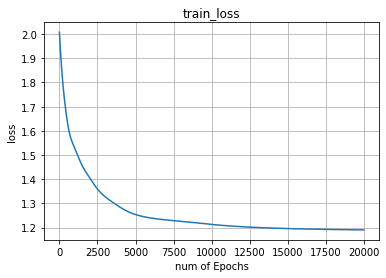

In [ ]:
# Visualizing losses 
import matplotlib.pyplot as plt
train_loss = hist.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss)

plt.figure(1, figsize = (7, 5))
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)

In [ ]:
# print values of all the weights and bias of LAYER#1 only

for layerNum, layer in enumerate(model.layers):
  print("Layer Number = ", layerNum)
  print("Weight Values = ")
  weights = layer.get_weights()[0]
  print(weights)
  print("Bias Values = ")
  biases = layer.get_weights()[1]
  print(biases)
  print("========================")
  break

Layer Number =  0
Weight Values = 
[[  7.953523     2.759479  ]
 [ -1.8234031    2.6004758 ]
 [  0.74046206   0.21032275]
 [  0.89997405  -0.4851844 ]
 [-12.545407    12.119521  ]
 [  8.760095     3.2307014 ]
 [ -1.4701331  -11.111783  ]]
Bias Values = 
[-1.9029764   0.44407502]


In [ ]:
# Word2Vec vectors = weights + bias
Word2Vec = weights + biases
print(Word2Vec)

# vector in Df
w2v_df = pd.DataFrame(Word2Vec, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
print(w2v_df)

[[  6.0505466    3.2035542 ]
 [ -3.7263794    3.044551  ]
 [ -1.1625143    0.6543978 ]
 [ -1.0030024   -0.04110938]
 [-14.448383    12.563596  ]
 [  6.857118     3.6747766 ]
 [ -3.3731093  -10.667708  ]]
       word         x1         x2
0         I   6.050547   3.203554
1       NLP  -3.726379   3.044551
2      deep  -1.162514   0.654398
3     enjoy  -1.003002  -0.041109
4    flying -14.448383  12.563596
5  learning   6.857118   3.674777
6      like  -3.373109 -10.667708


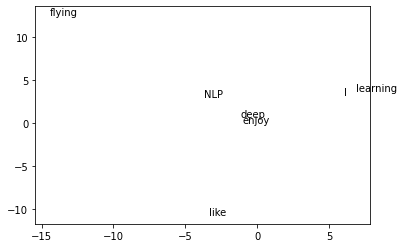

In [ ]:
# Vector Plot
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
  ax.annotate(word, (x1, x2))

PADDING = 1.0 
x_axis_min = np.amin(Word2Vec, axis = 0)[0]-PADDING
x_axis_max = np.amax(Word2Vec, axis = 0)[0]+PADDING
y_axis_min = np.amin(Word2Vec, axis = 0)[1]-PADDING
y_axis_max = np.amax(Word2Vec, axis = 0)[1]+PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (5,5)

plt.show()